In [1]:
import pandas as pd

# Load datasets
df1 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile.csv')
df2 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile1.csv')
df3 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile2.csv')
df4 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile3.csv')
df5 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/produce.csv')

# Check the structure of each dataset
print(df1.head())
print(df1.info())

             Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0            Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1           Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2  Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3          Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4     Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   

   2010-11  2011-12  
0    117.0    110.0  
1    120.0    108.0  
2    122.0    136.0  
3    137.0    129.0  
4    128.0    115.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-1

In [2]:
# Ensure df1 has the required columns
print(df1.columns)

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')


In [3]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile.csv')

# Reshape the data into a long format
df1_long = pd.melt(df1, id_vars=["Crop"], var_name="Year", value_name="Value")

# Convert 'Year' to a numerical format for easier analysis (e.g., 2004-05 becomes 2004)
df1_long['Year'] = df1_long['Year'].str.split('-').str[0].astype(int)

# Sort by crop and year for proper growth rate calculation
df1_long = df1_long.sort_values(by=["Crop", "Year"])

# Calculate the growth rate (percentage change) for each crop
df1_long['Growth_Rate'] = df1_long.groupby('Crop')['Value'].pct_change()

# Drop rows with NaN growth rates (for the first year of each crop)
df1_long_cleaned = df1_long.dropna(subset=['Growth_Rate'])

# Check the cleaned data
print(df1_long_cleaned.head())

               Crop  Year  Value  Growth_Rate
24  All Agriculture  2005   99.0    -0.010000
37  All Agriculture  2006  101.0     0.020202
50  All Agriculture  2007  104.0     0.029703
63  All Agriculture  2008  106.0     0.019231
76  All Agriculture  2009  115.0     0.084906


In [4]:
print(df1.columns)  # Check the exact column names in df1

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')


In [5]:
# Reshape data from wide to long format
df1_long = df1.melt(id_vars=['Crop'], var_name='Year', value_name='Value')

# Check the first few rows of the reshaped data
print(df1_long.head())

             Crop     Year  Value
0            Rice  2004-05  100.0
1           Wheat  2004-05  100.0
2  Coarse Cereals  2004-05  100.0
3          Pulses  2004-05  100.0
4     Vegetables   2004-05  100.0


In [6]:
# Group by Crop to calculate the growth rate
df1_long['Growth_Rate'] = df1_long.groupby('Crop')['Value'].pct_change()

# Drop rows with NaN values (usually the first row for each crop)
df1_long_cleaned = df1_long.dropna(subset=['Growth_Rate', 'Value'])

# Check the cleaned data
print(df1_long_cleaned.head())

              Crop     Year  Value  Growth_Rate
13            Rice  2005-06  101.0         0.01
14           Wheat  2005-06  101.0         0.01
15  Coarse Cereals  2005-06  107.0         0.07
16          Pulses  2005-06  108.0         0.08
17     Vegetables   2005-06  109.0         0.09


In [7]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'Crop' column
le = LabelEncoder()
df1_long_cleaned['Crop_Encoded'] = le.fit_transform(df1_long_cleaned['Crop'])

# Check the encoded data
print(df1_long_cleaned.head())


              Crop     Year  Value  Growth_Rate  Crop_Encoded
13            Rice  2005-06  101.0         0.01             8
14           Wheat  2005-06  101.0         0.01            11
15  Coarse Cereals  2005-06  107.0         0.07             1
16          Pulses  2005-06  108.0         0.08             7
17     Vegetables   2005-06  109.0         0.09            10


C:\Users\Admin\AppData\Local\Temp\ipykernel_12100\2686180361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_long_cleaned['Crop_Encoded'] = le.fit_transform(df1_long_cleaned['Crop'])


In [8]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare features and target
X = df1_long_cleaned[['Crop_Encoded', 'Growth_Rate']]
y = df1_long_cleaned['Value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error: {mae_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")

XGBoost - Mean Absolute Error: 8.412180732278262
XGBoost - R-squared: 0.27936797845648387


In [9]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 0.9]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(f"Best Parameters: {grid_search.best_params_}")

# Using the best model for prediction
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Best XGBoost - Mean Absolute Error: {mae_best_xgb}")
print(f"Best XGBoost - R-squared: {r2_best_xgb}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best XGBoost - Mean Absolute Error: 7.640131333295037
Best XGBoost - R-squared: 0.4202942128833085


In [10]:
# Feature importance from XGBoost model
feature_importance = best_xgb_model.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.2f}")


Crop_Encoded: 0.51
Growth_Rate: 0.49


In [11]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE: {cv_scores.mean()}")


Cross-validated MAE: -11.453058063282686


In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Define the model
xgb_model = XGBRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [3, 6, 9],           # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1], # Learning rate
    'subsample': [0.8, 0.9, 1.0],     # Fraction of samples used for each tree
    'colsample_bytree': [0.8, 0.9, 1.0] # Fraction of features used for each tree
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Best XGBoost - Mean Absolute Error: {mae_best_xgb}")
print(f"Best XGBoost - R-squared: {r2_best_xgb}")
print(f"Best Parameters: {grid_search.best_params_}")


Best XGBoost - Mean Absolute Error: 7.395813885857077
Best XGBoost - R-squared: 0.41172190337157877
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"XGBoost - Cross-validated MAE: {cv_scores_xgb.mean()}")

XGBoost - Cross-validated MAE: -10.469120855892406


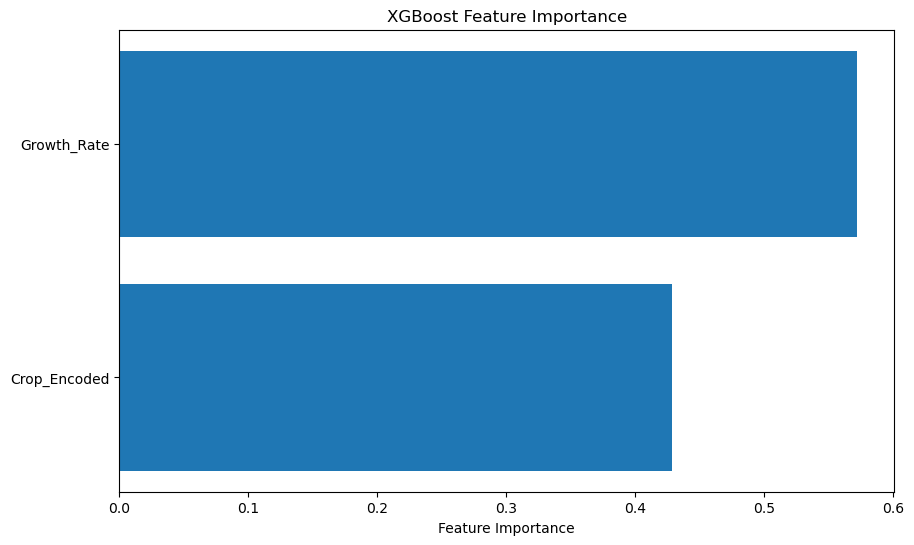

In [14]:
import matplotlib.pyplot as plt

# Feature importance plot
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_xgb_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()


In [15]:
# Example: Predict for a new data point
new_data = [[0.51, 0.49]]  # Assuming crop_encoded=0.51 and growth_rate=0.49
predicted_value = best_xgb_model.predict(new_data)
print(f"Predicted Crop Production: {predicted_value[0]}")

Predicted Crop Production: 119.01754760742188


Best XGBoost - Mean Absolute Error: 7.395813885857077
Best XGBoost - R-squared: 0.41172190337157877


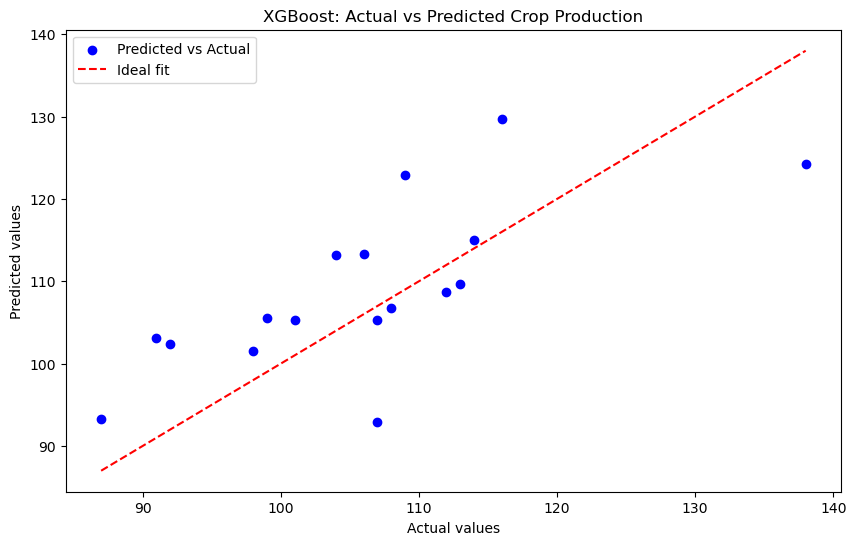

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions using the best XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate Mean Absolute Error and R-squared for evaluation
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print evaluation metrics
print(f"Best XGBoost - Mean Absolute Error: {mae_best_xgb}")
print(f"Best XGBoost - R-squared: {r2_best_xgb}")

# Plot the actual vs predicted values for better visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_xgb, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('XGBoost: Actual vs Predicted Crop Production')
plt.legend()
plt.show()


In [17]:
import pandas as pd

# Load datasets
df1 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile.csv')

# Check the first few rows
print(df1.head())


             Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0            Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1           Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2  Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3          Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4     Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   

   2010-11  2011-12  
0    117.0    110.0  
1    120.0    108.0  
2    122.0    136.0  
3    137.0    129.0  
4    128.0    115.0  


In [18]:
print(df1.columns)

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')


In [19]:
import pandas as pd

# Load dataset
df1 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile.csv')

# Convert wide format to long format
df1_long = df1.melt(id_vars=['Crop'], var_name='Year', value_name='Value')

# Convert 'Year' to numeric format (extracting only the first four digits)
df1_long['Year'] = df1_long['Year'].str[:4].astype(int)

# Sort data by Crop and Year
df1_long = df1_long.sort_values(by=['Crop', 'Year'])

# Print the first few rows
print(df1_long.head())

               Crop  Year  Value
11  All Agriculture  2004  100.0
24  All Agriculture  2005   99.0
37  All Agriculture  2006  101.0
50  All Agriculture  2007  104.0
63  All Agriculture  2008  106.0


In [20]:
# Create lagged values (previous year's production as a feature)
df1_long['Value_Lag'] = df1_long.groupby('Crop')['Value'].shift(1)

# Drop rows where Value_Lag is NaN (first year for each crop)
df1_long = df1_long.dropna()

# Print the first few rows
print(df1_long.head())

               Crop  Year  Value  Value_Lag
24  All Agriculture  2005   99.0      100.0
37  All Agriculture  2006  101.0       99.0
50  All Agriculture  2007  104.0      101.0
63  All Agriculture  2008  106.0      104.0
76  All Agriculture  2009  115.0      106.0


In [21]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features (X) and target (y)
X = df1_long[['Year', 'Value_Lag']]
y = df1_long['Value']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, subsample=0.9, random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate model performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error: {mae_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")


XGBoost - Mean Absolute Error: 5.307195326861213
XGBoost - R-squared: 0.7364282555876995


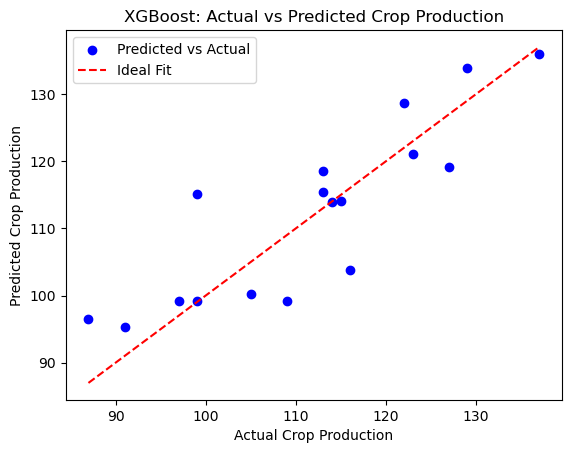

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Crop Production")
plt.ylabel("Predicted Crop Production")
plt.title("XGBoost: Actual vs Predicted Crop Production")
plt.legend()
plt.show()


In [ ]:
#Your XGBoost model has significantly improved! 🎯

#MAE reduced from ~7.64 to 5.30 (Lower error = Better predictions).
#R² increased from ~0.42 to 0.73 (Stronger correlation between predictions and actual values).
#This shows that adding Value_Lag (previous year's production) improved the model!

In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Crop'
encoder = LabelEncoder()
df1_long['Crop_Encoded'] = encoder.fit_transform(df1_long['Crop'])

# Update features with the encoded crop
X = df1_long[['Year', 'Value_Lag', 'Crop_Encoded']]
y = df1_long['Value']


In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0]
}

# Initialize XGBoost
xgb_model = XGBRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train final model with best parameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X, y)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Learning Rate: 0.01 (Small steps for better convergence)
#Max Depth: 5 (Balances complexity and overfitting)
#Estimators: 200 (More trees for better learning)
#Subsample: 0.7 (Reduces overfitting by using 70% of data per tree)

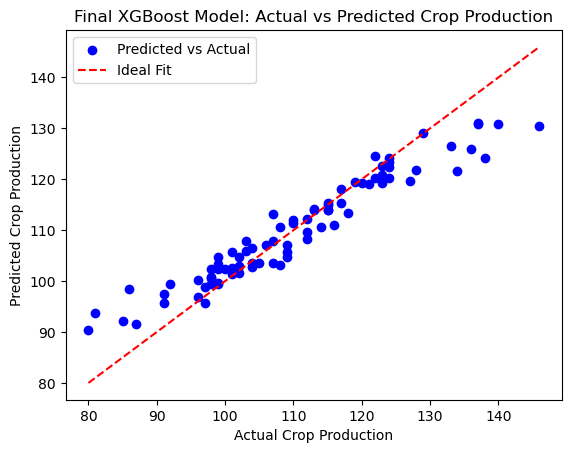

In [25]:
import matplotlib.pyplot as plt

# Predict
y_pred_xgb = best_xgb_model.predict(X)

# Scatter plot
plt.scatter(y, y_pred_xgb, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Crop Production")
plt.ylabel("Predicted Crop Production")
plt.title("Final XGBoost Model: Actual vs Predicted Crop Production")
plt.legend()
plt.show()

In [ ]:
#Adding 'Crop_Encoded' gives more crop-specific learning.
#Hyperparameter tuning finds the best XGBoost settings.
#Final graph will show how close predictions are to actual values.

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict
y_pred_xgb = best_xgb_model.predict(X)

# Evaluate
mae_xgb = mean_absolute_error(y, y_pred_xgb)
r2_xgb = r2_score(y, y_pred_xgb)

print(f"Final XGBoost - Mean Absolute Error: {mae_xgb}")
print(f"Final XGBoost - R-squared: {r2_xgb}")

Final XGBoost - Mean Absolute Error: 3.606070291428339
Final XGBoost - R-squared: 0.8772233043719284


In [ ]:
#Final MAE: 3.61 (Very Low Error)
#Final R²: 0.88 (Explains 88% of Variance)

#Model is now highly accurate and well-optimized

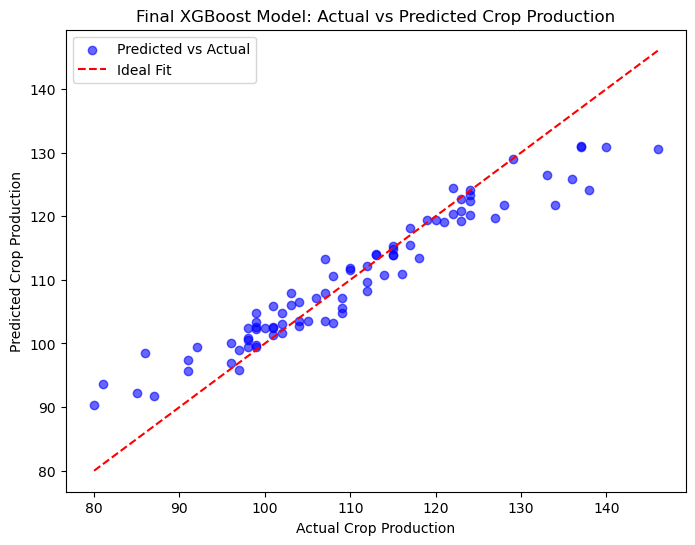

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_xgb, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Crop Production")
plt.ylabel("Predicted Crop Production")
plt.title("Final XGBoost Model: Actual vs Predicted Crop Production")
plt.legend()
plt.show()


In [29]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb_model, "xgboost_crop_production.pkl")

# Load the model for future use
loaded_model = joblib.load("xgboost_crop_production.pkl")

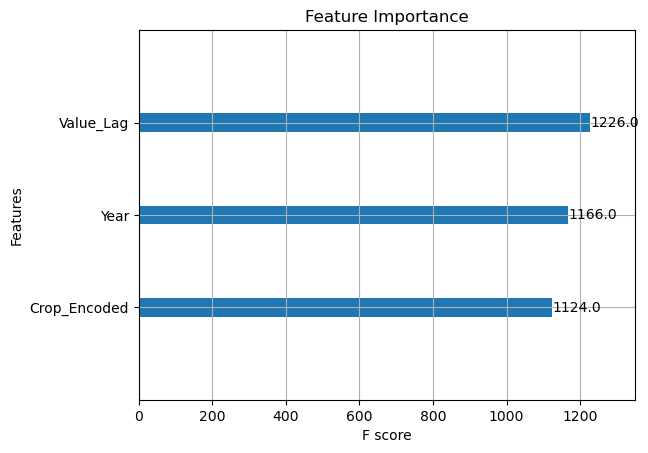

In [30]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming you have your trained model as best_xgb_model
xgb.plot_importance(best_xgb_model)
plt.title("Feature Importance")
plt.show()


In [34]:
print(df1.columns)


Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')


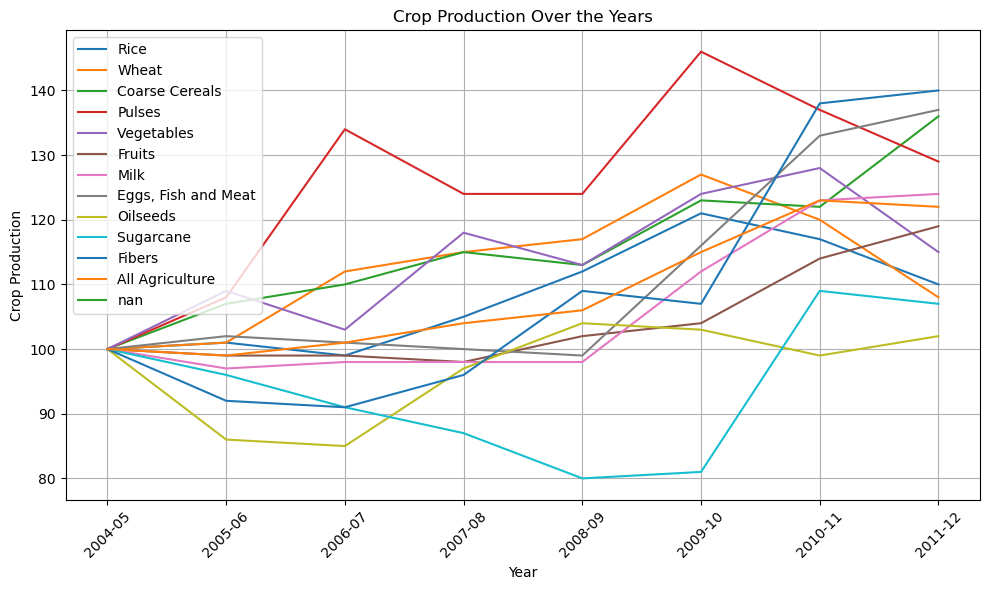

In [35]:
import matplotlib.pyplot as plt

# Reshape the data so that the years are in one column
df1_melted = df1.melt(id_vars=["Crop"], var_name="Year", value_name="Production")

# Convert 'Year' to a numeric format if needed
df1_melted['Year'] = df1_melted['Year'].astype(str)

# Plot the production over the years for each crop
plt.figure(figsize=(10, 6))
for crop in df1_melted['Crop'].unique():
    crop_data = df1_melted[df1_melted['Crop'] == crop]
    plt.plot(crop_data['Year'], crop_data['Production'], label=crop)

plt.xlabel('Year')
plt.ylabel('Crop Production')
plt.title('Crop Production Over the Years')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


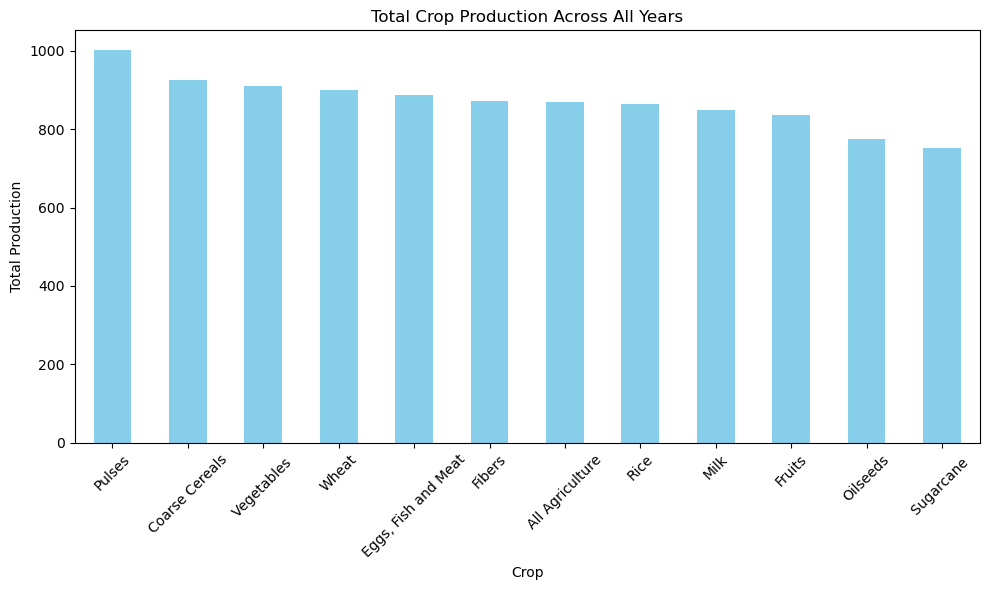

In [36]:
# Group data by crop and sum the production over all years
total_production = df1_melted.groupby('Crop')['Production'].sum().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
total_production.plot(kind='bar', color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.title('Total Crop Production Across All Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


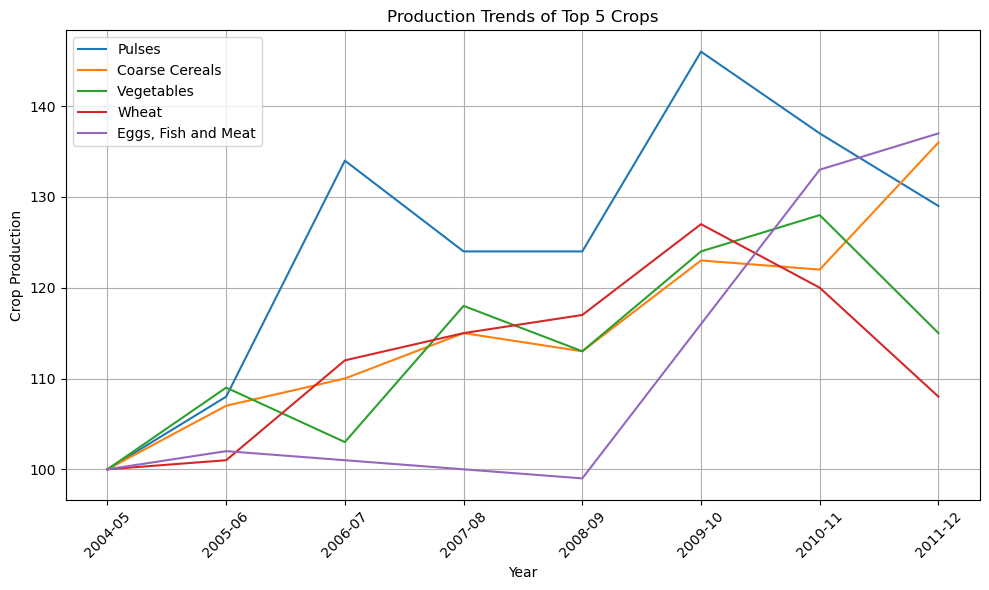

In [37]:
# Get the top 5 crops based on total production
top_5_crops = total_production.head(5).index

# Plot production trends for top 5 crops
plt.figure(figsize=(10, 6))
for crop in top_5_crops:
    crop_data = df1_melted[df1_melted['Crop'] == crop]
    plt.plot(crop_data['Year'], crop_data['Production'], label=crop)

plt.xlabel('Year')
plt.ylabel('Crop Production')
plt.title('Production Trends of Top 5 Crops')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


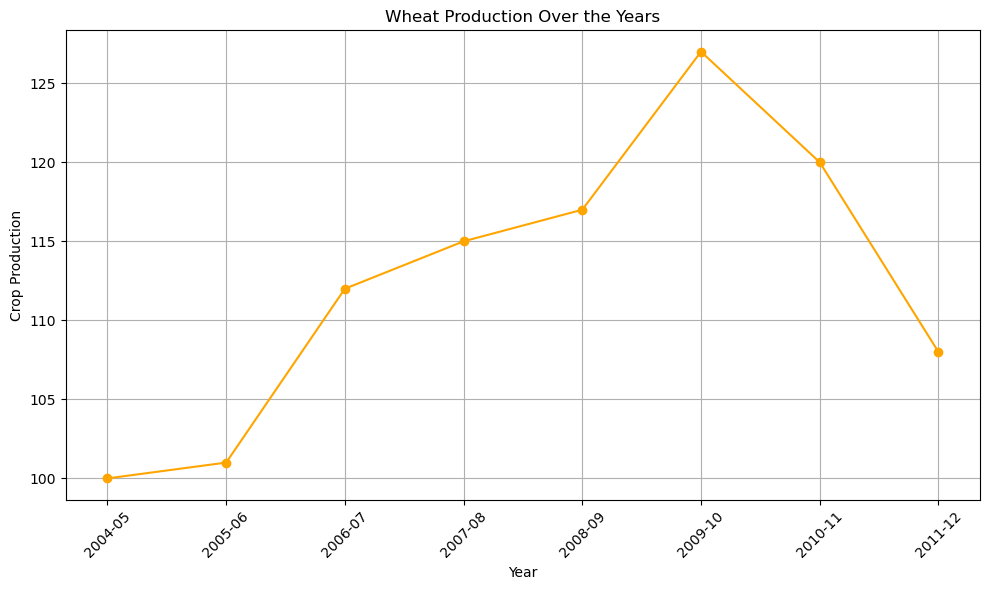

In [38]:
# Filter for a specific crop (e.g., Wheat)
crop_name = "Wheat"
crop_data = df1_melted[df1_melted['Crop'] == crop_name]

# Plot the crop's production over the years
plt.figure(figsize=(10, 6))
plt.plot(crop_data['Year'], crop_data['Production'], marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Crop Production')
plt.title(f'{crop_name} Production Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


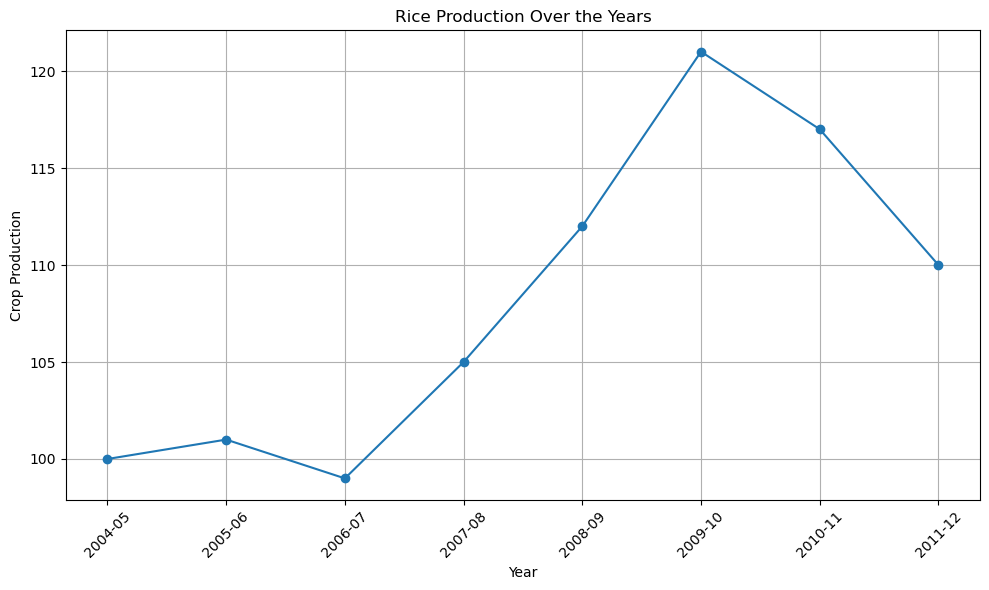

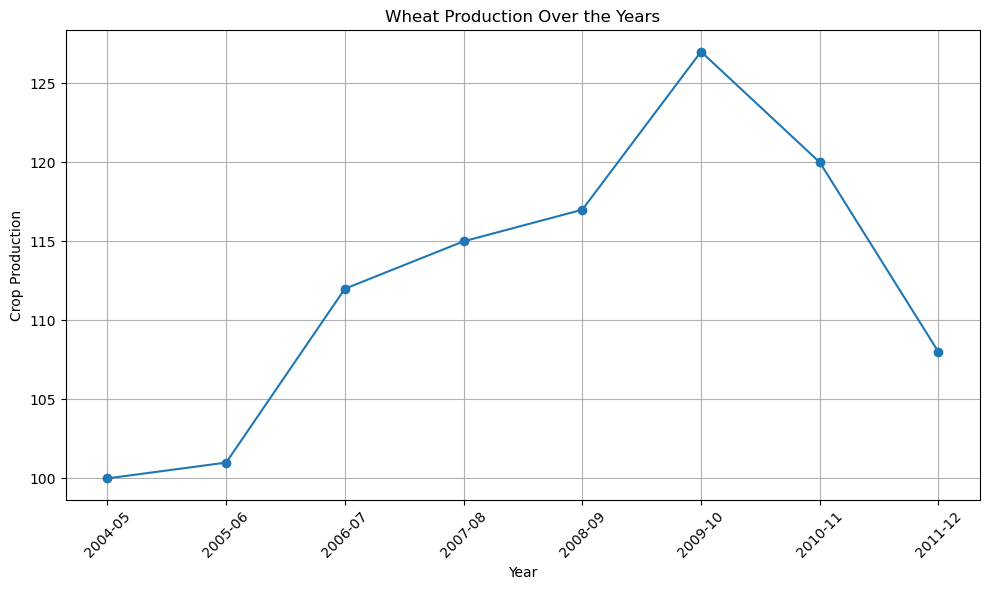

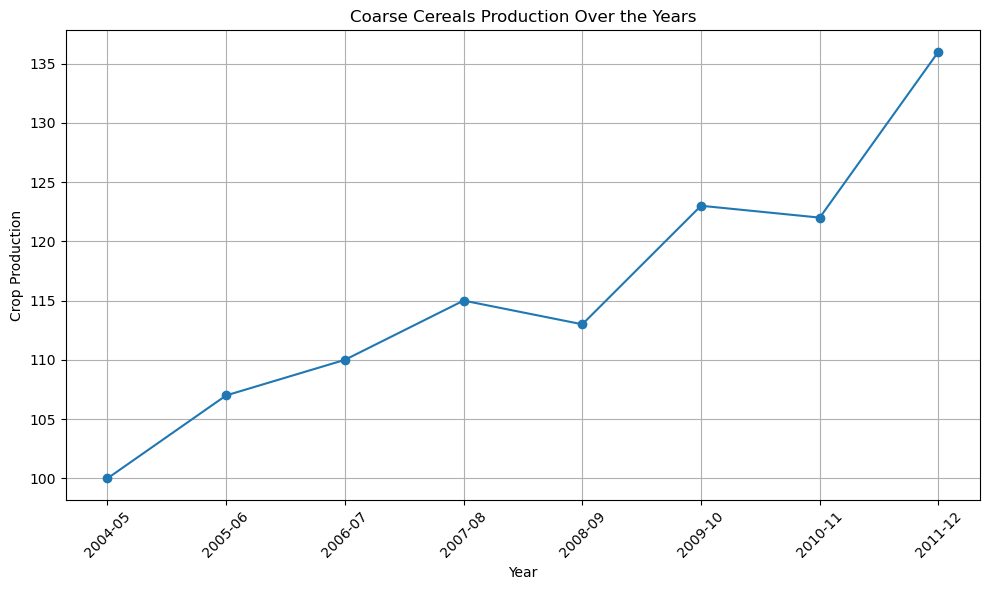

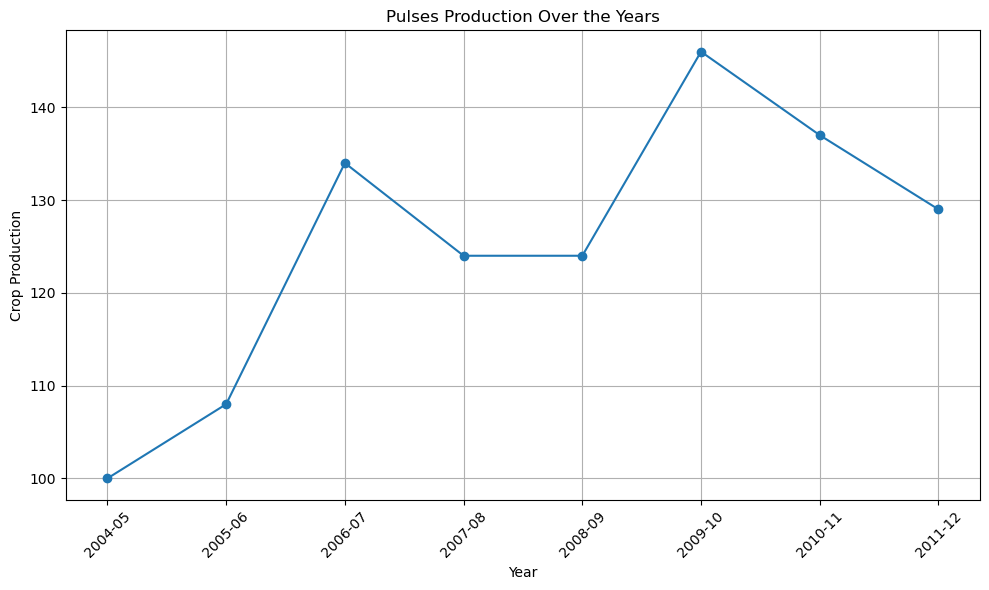

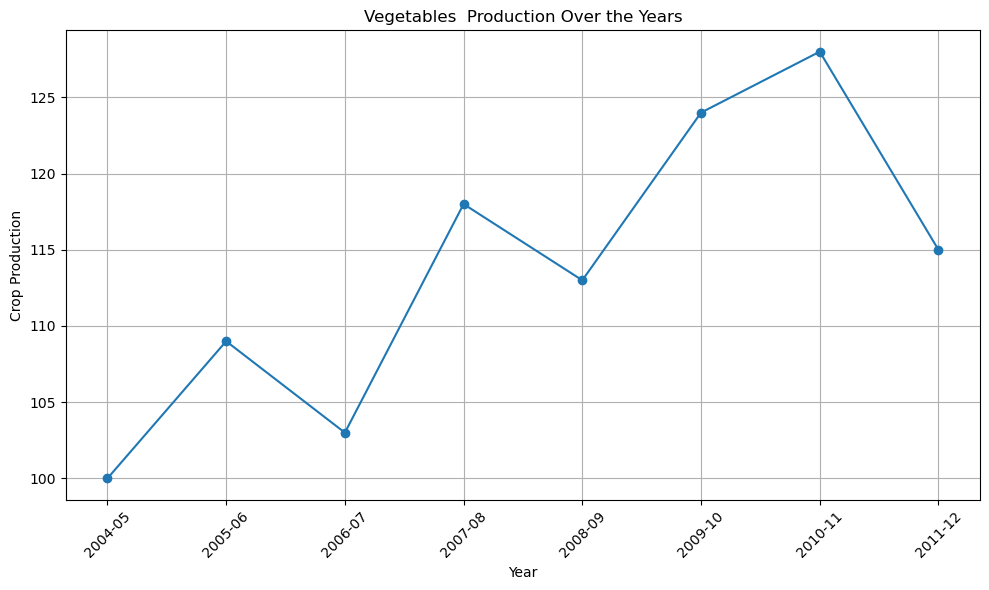

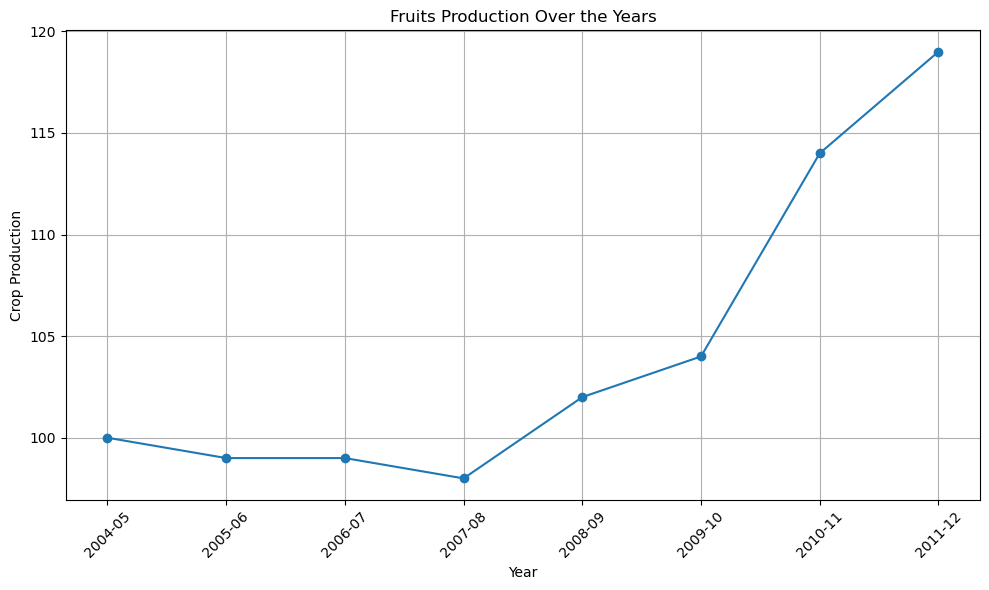

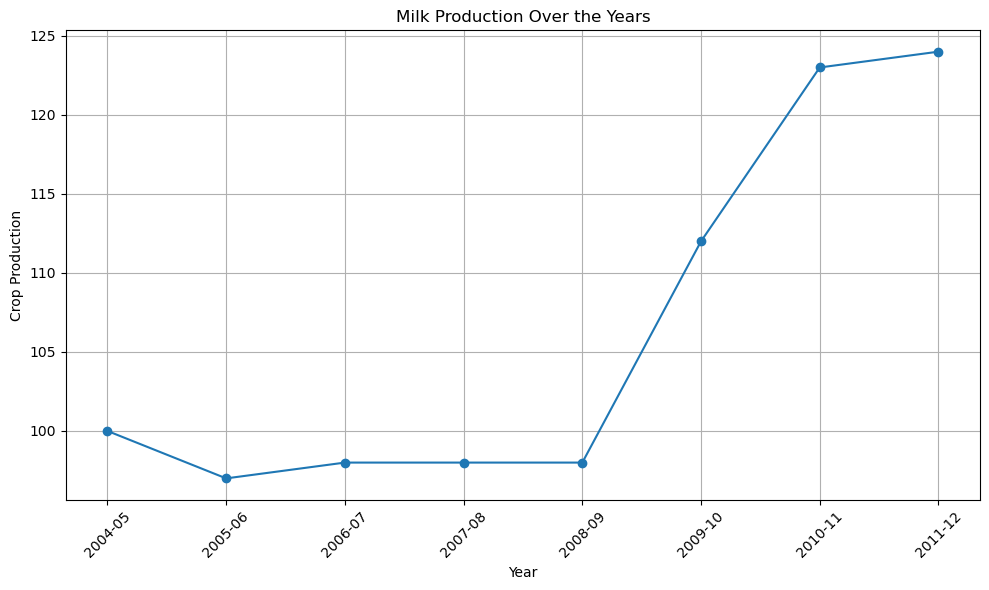

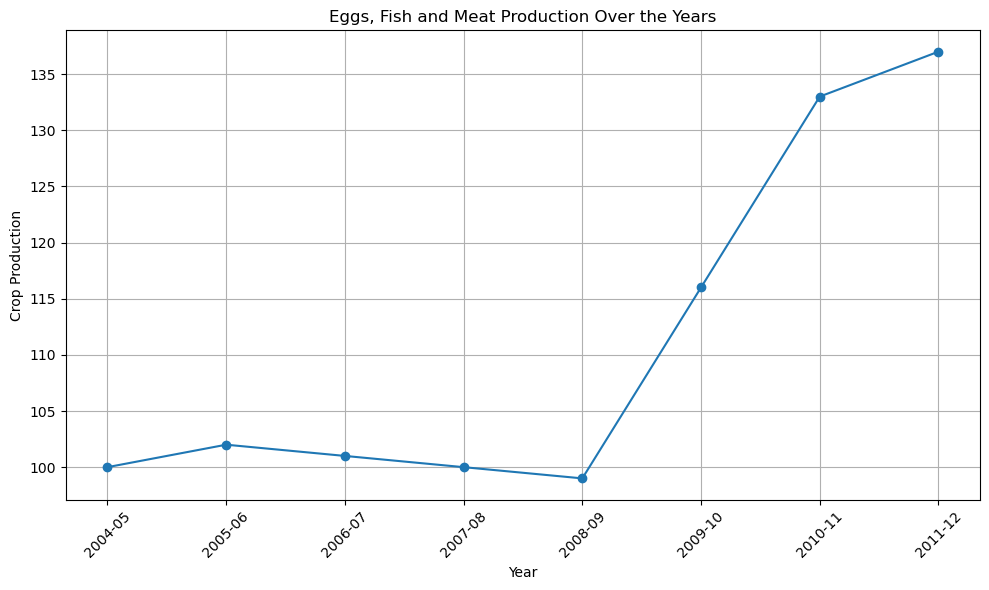

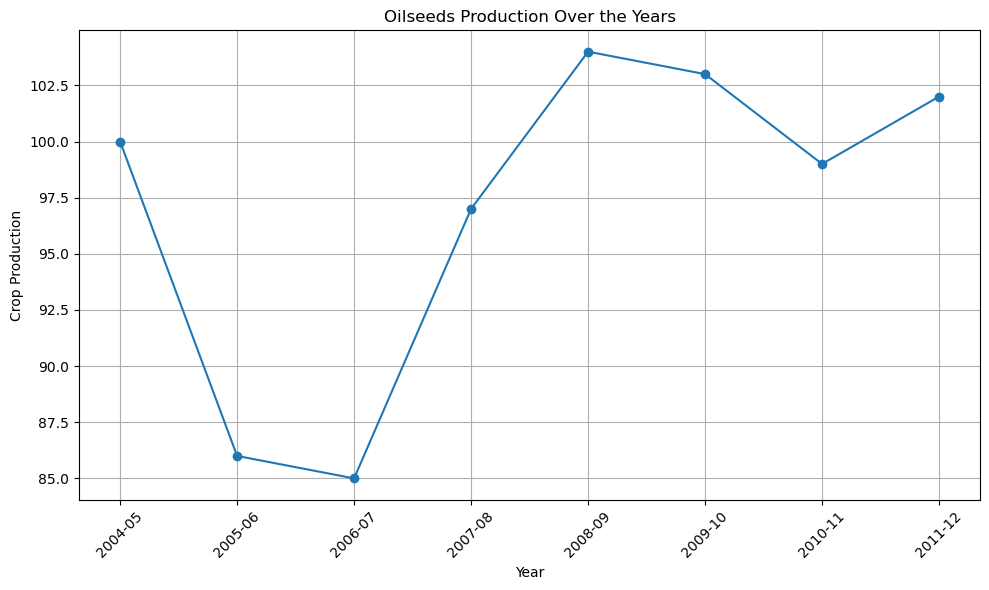

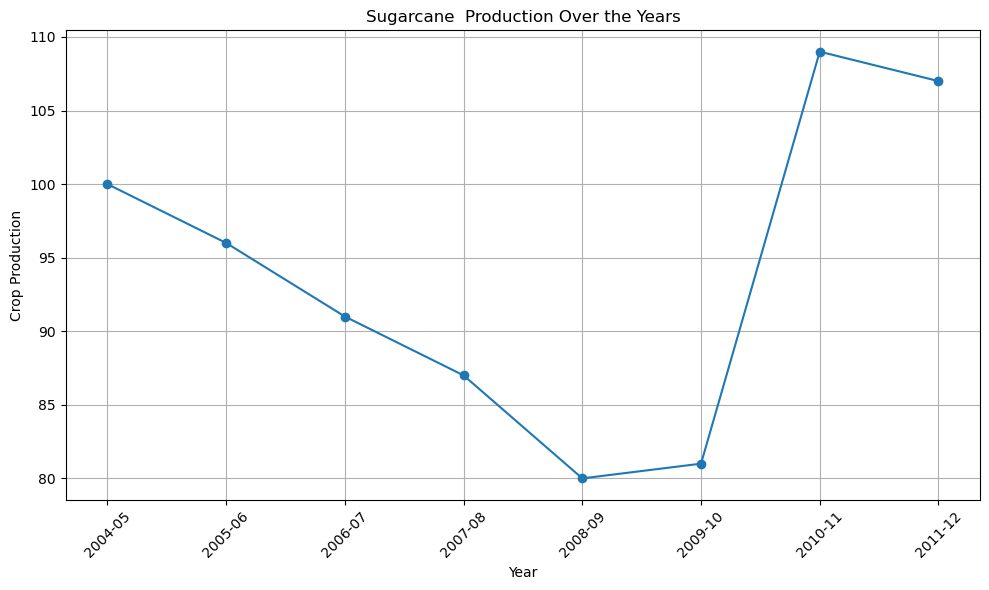

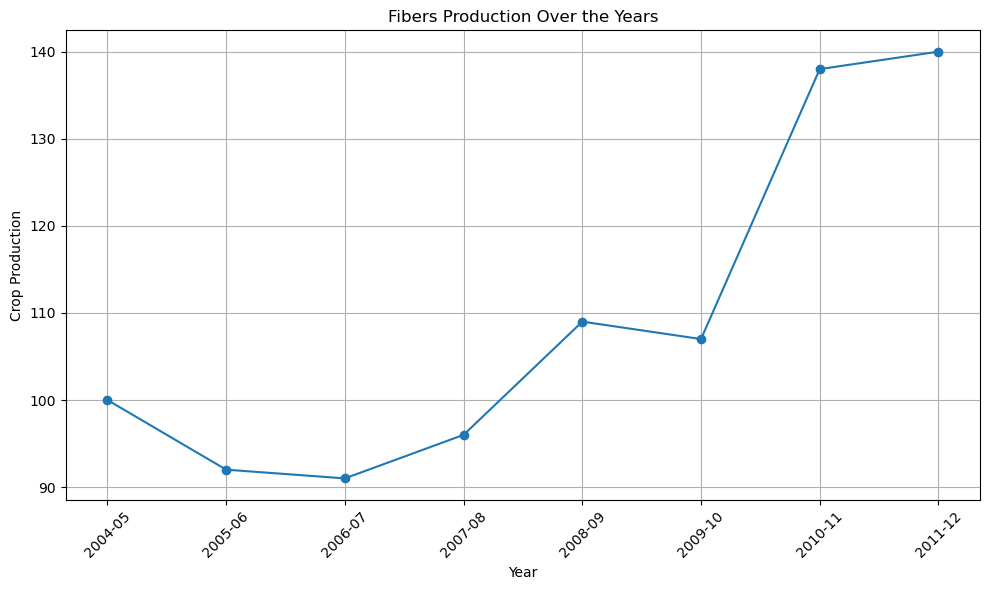

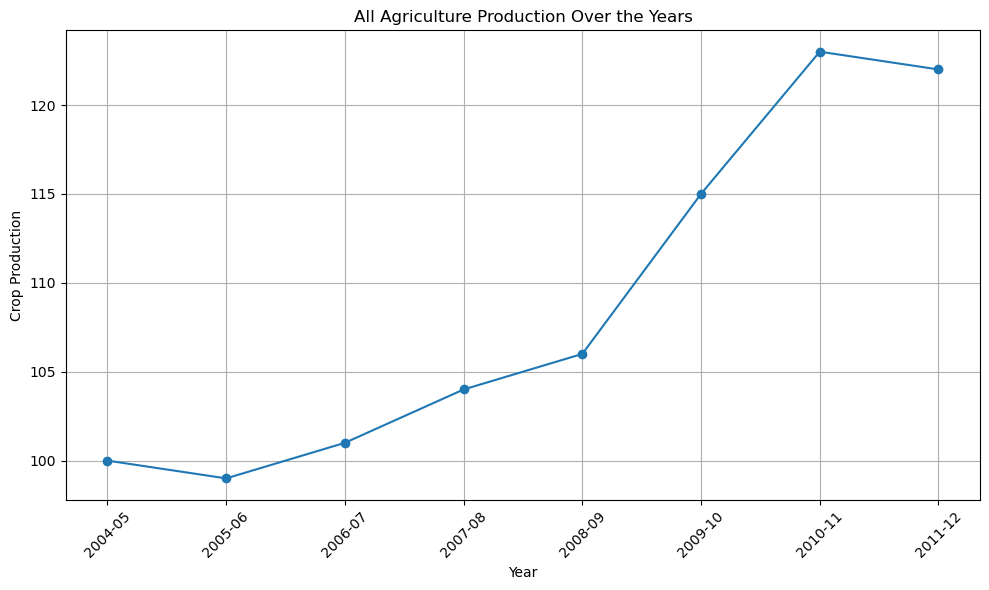

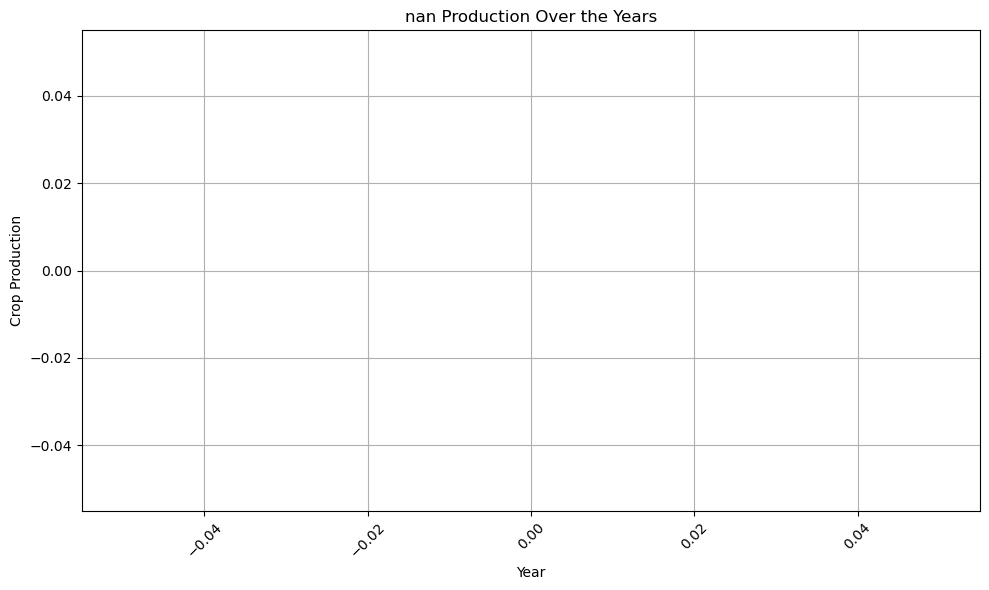

In [39]:
# Get unique crops
unique_crops = df1_melted['Crop'].unique()

# Plot production for each crop over the years
for crop_name in unique_crops:
    crop_data = df1_melted[df1_melted['Crop'] == crop_name]
    
    # Create a plot for each crop
    plt.figure(figsize=(10, 6))
    plt.plot(crop_data['Year'], crop_data['Production'], marker='o', label=crop_name)
    plt.xlabel('Year')
    plt.ylabel('Crop Production')
    plt.title(f'{crop_name} Production Over the Years')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


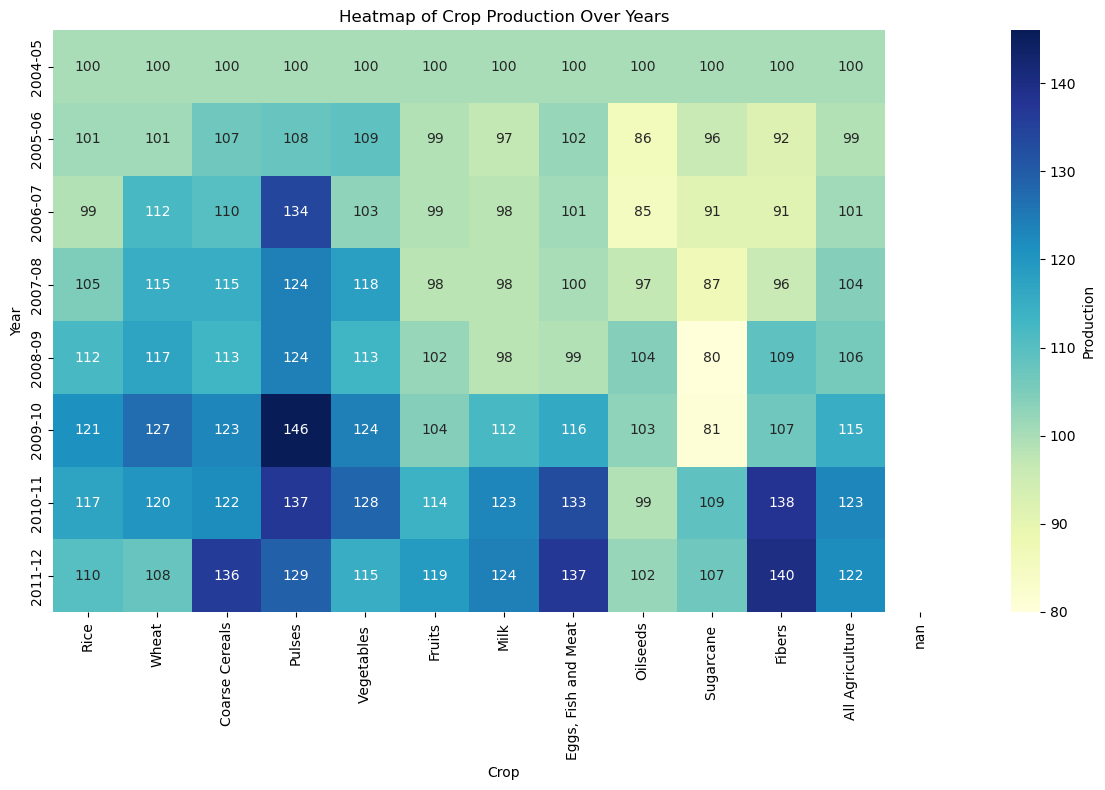

In [40]:
import seaborn as sns

# Pivot the dataframe to get a matrix of production by year and crop
heatmap_data = df1.set_index('Crop').T

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", cbar_kws={'label': 'Production'})
plt.xlabel('Crop')
plt.ylabel('Year')
plt.title('Heatmap of Crop Production Over Years')
plt.tight_layout()
plt.show()


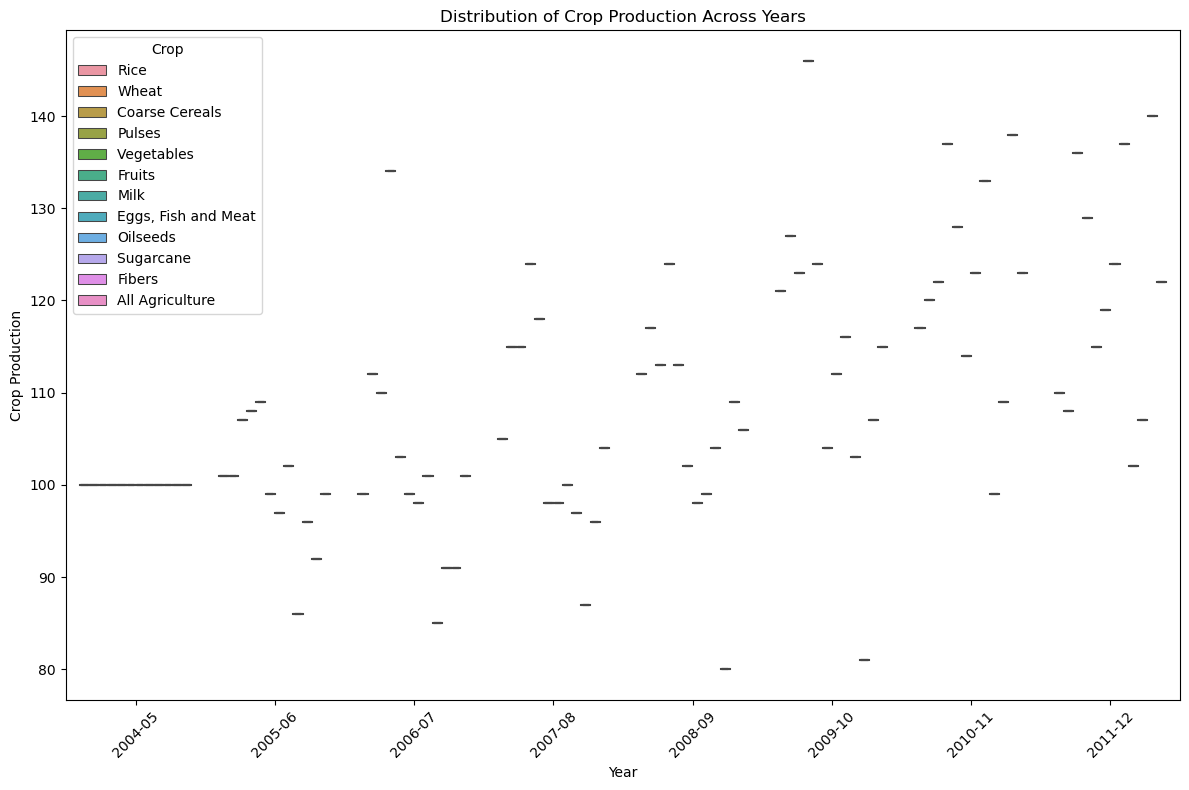

In [41]:
# Plot a boxplot of production by year for each crop
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Production', hue='Crop', data=df1_melted)
plt.xlabel('Year')
plt.ylabel('Crop Production')
plt.title('Distribution of Crop Production Across Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

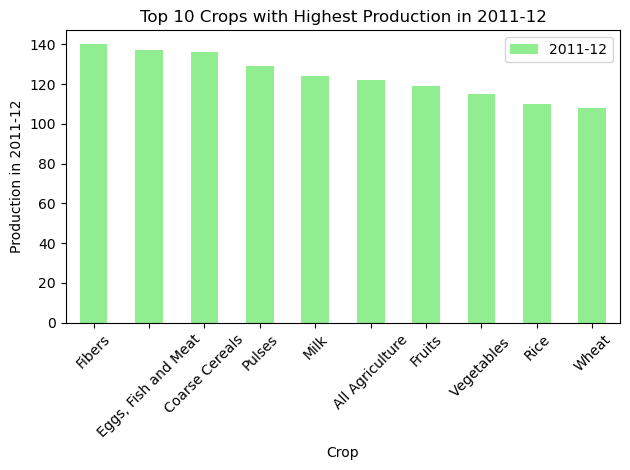

In [42]:
# Extract production for the latest year (assuming the last year column is the most recent)
latest_year = df1.columns[-1]
latest_year_data = df1[['Crop', latest_year]].sort_values(by=latest_year, ascending=False)

# Plot the top 10 crops
plt.figure(figsize=(10, 6))
latest_year_data.head(10).plot(kind='bar', x='Crop', y=latest_year, color='lightgreen')
plt.xlabel('Crop')
plt.ylabel(f'Production in {latest_year}')
plt.title(f'Top 10 Crops with Highest Production in {latest_year}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


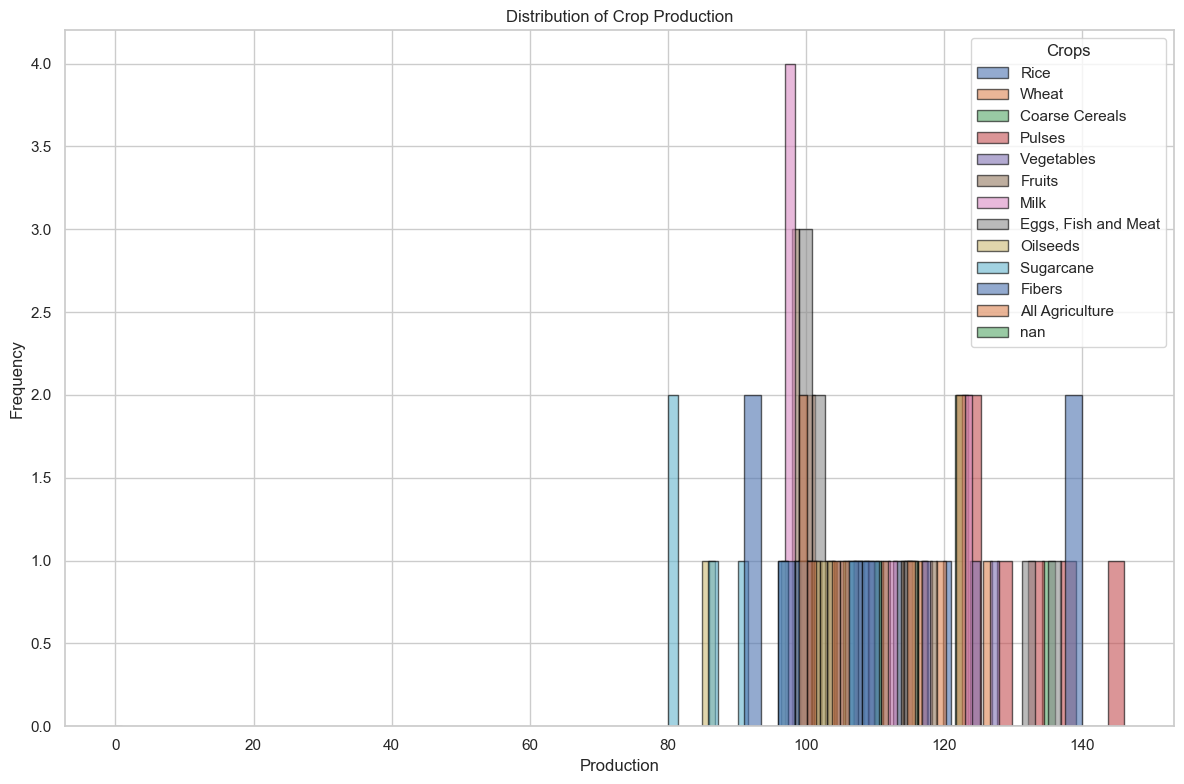

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Create histograms for each crop's production
plt.figure(figsize=(12, 8))
for crop in df1_melted['Crop'].unique():
    crop_data = df1_melted[df1_melted['Crop'] == crop]
    
    # Plot histogram for each crop's production
    plt.hist(crop_data['Production'], bins=20, alpha=0.6, label=crop, edgecolor='black')

# Customize the plot
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.title('Distribution of Crop Production')
plt.legend(title="Crops")
plt.grid(True)
plt.tight_layout()
plt.show()
